In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from lazypredict.Supervised import LazyClassifier
from sklearn.inspection import permutation_importance
from mpl_toolkits.mplot3d import Axes3D
import joblib
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

print("Libraries loaded successfully.")


Libraries loaded successfully.


In [2]:
# Load dataset
file_path = 'smoking.csv'
df = pd.read_csv(file_path)

# Display dataset shape and preview
print(f"Dataset loaded successfully with shape: {df.shape}")
print("Preview of the dataset:")
print(df.head())


Dataset loaded successfully with shape: (55692, 27)
Preview of the dataset:
   ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60      81.30            1.20   
1   1      F   40         160          60      81.00            0.80   
2   2      M   55         170          60      80.00            0.80   
3   3      M   40         165          70      88.00            1.50   
4   4      F   40         155          60      86.00            1.00   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0             1.00           1.00            1.00  ...       12.90   
1             0.60           1.00            1.00  ...       12.70   
2             0.80           1.00            1.00  ...       15.80   
3             1.50           1.00            1.00  ...       14.70   
4             1.00           1.00            1.00  ...       12.50   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental car

Missing values per column:
ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64


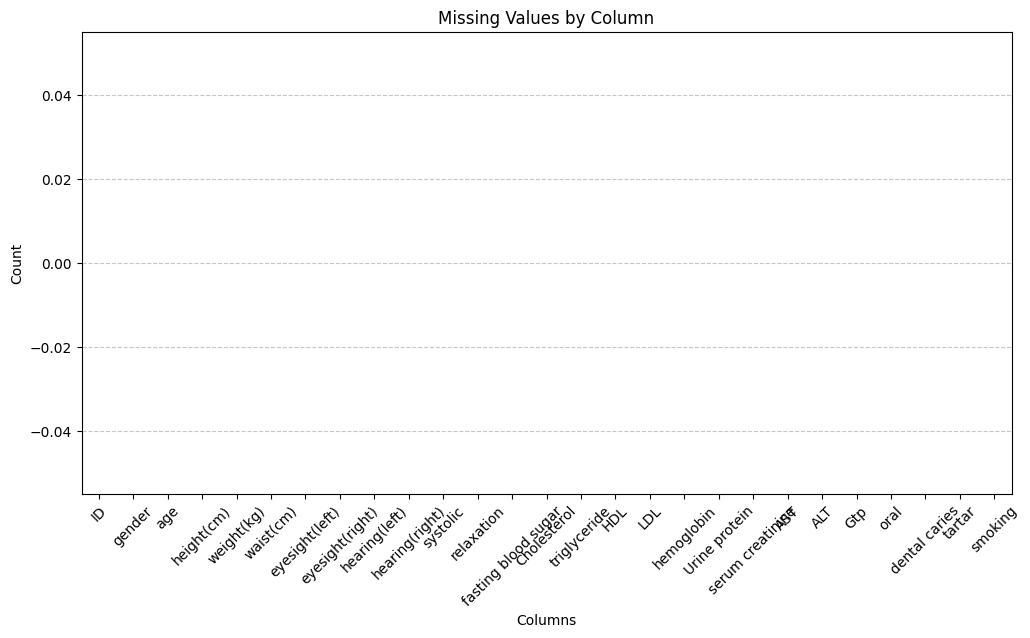

In [3]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, color='skyblue')
plt.title("Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [4]:
# Impute missing numerical values with the mean
imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=['number']).columns] = imputer.fit_transform(df.select_dtypes(include=['number']))

# Verify missing values handled
print("Total missing values after imputation:", df.isnull().sum().sum())


Total missing values after imputation: 0


In [5]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Merge encoded data back into the dataset
df = pd.concat([df.drop(columns=categorical_cols), encoded_data], axis=1)

print("Categorical columns encoded successfully.")


Categorical columns encoded successfully.


In [6]:
# Scale numerical features for uniformity
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Numerical features scaled successfully.")


Numerical features scaled successfully.


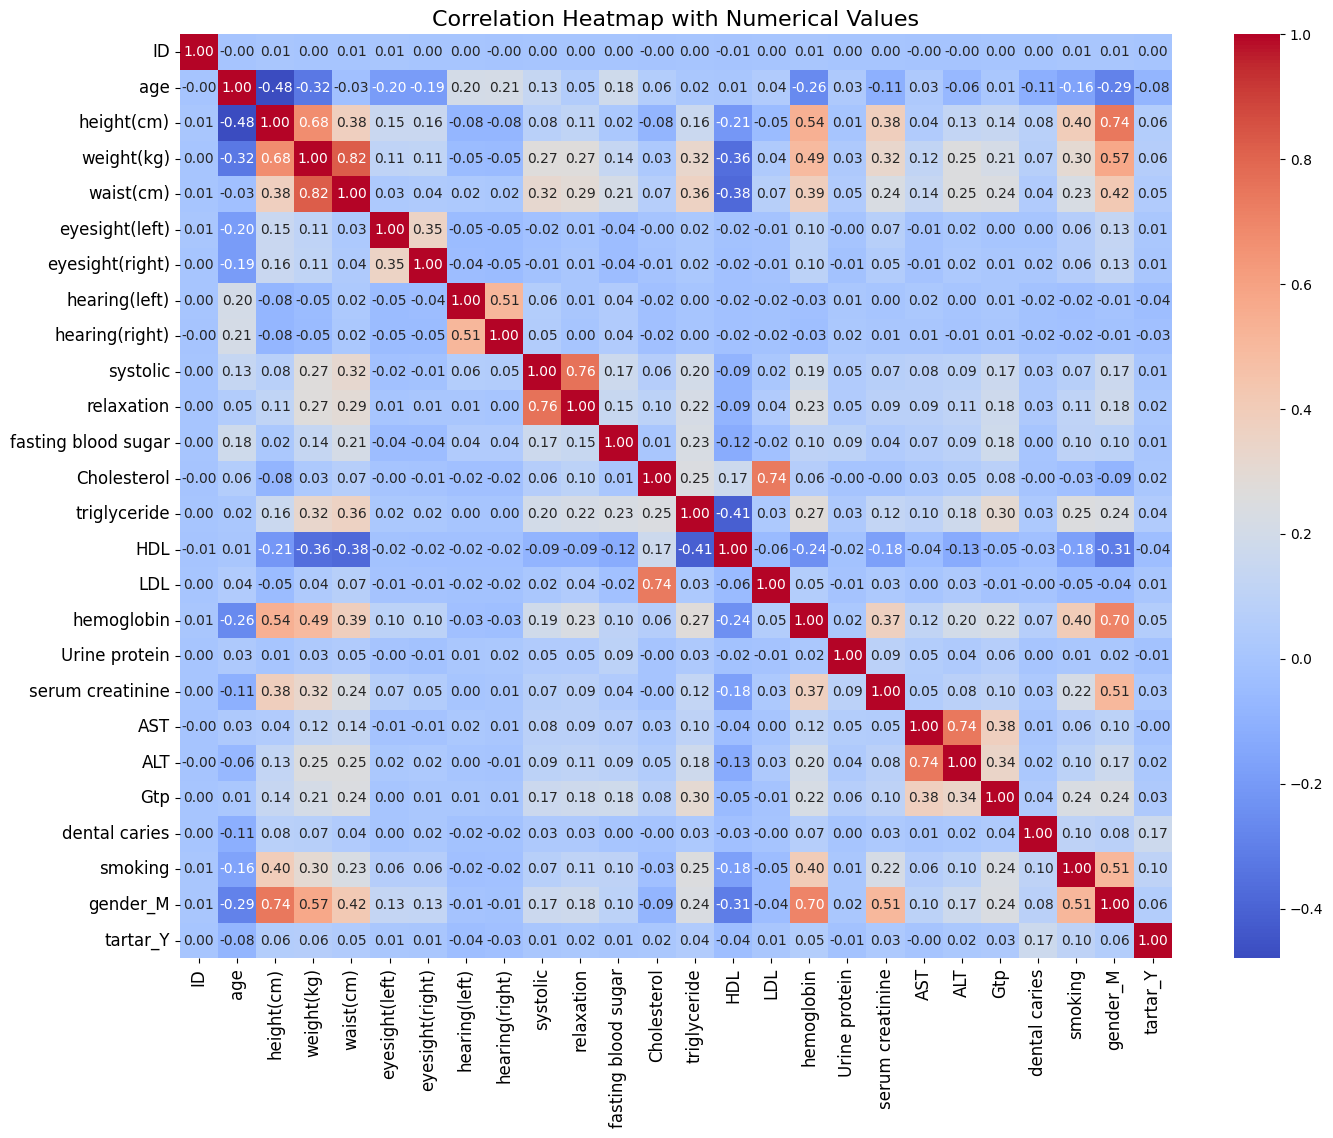

In [7]:
# Generate correlation heatmap with numerical values
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 10})
plt.title("Correlation Heatmap with Numerical Values", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("correlation_heatmap_with_values.png", dpi=300)
plt.show()


BMI column created successfully.


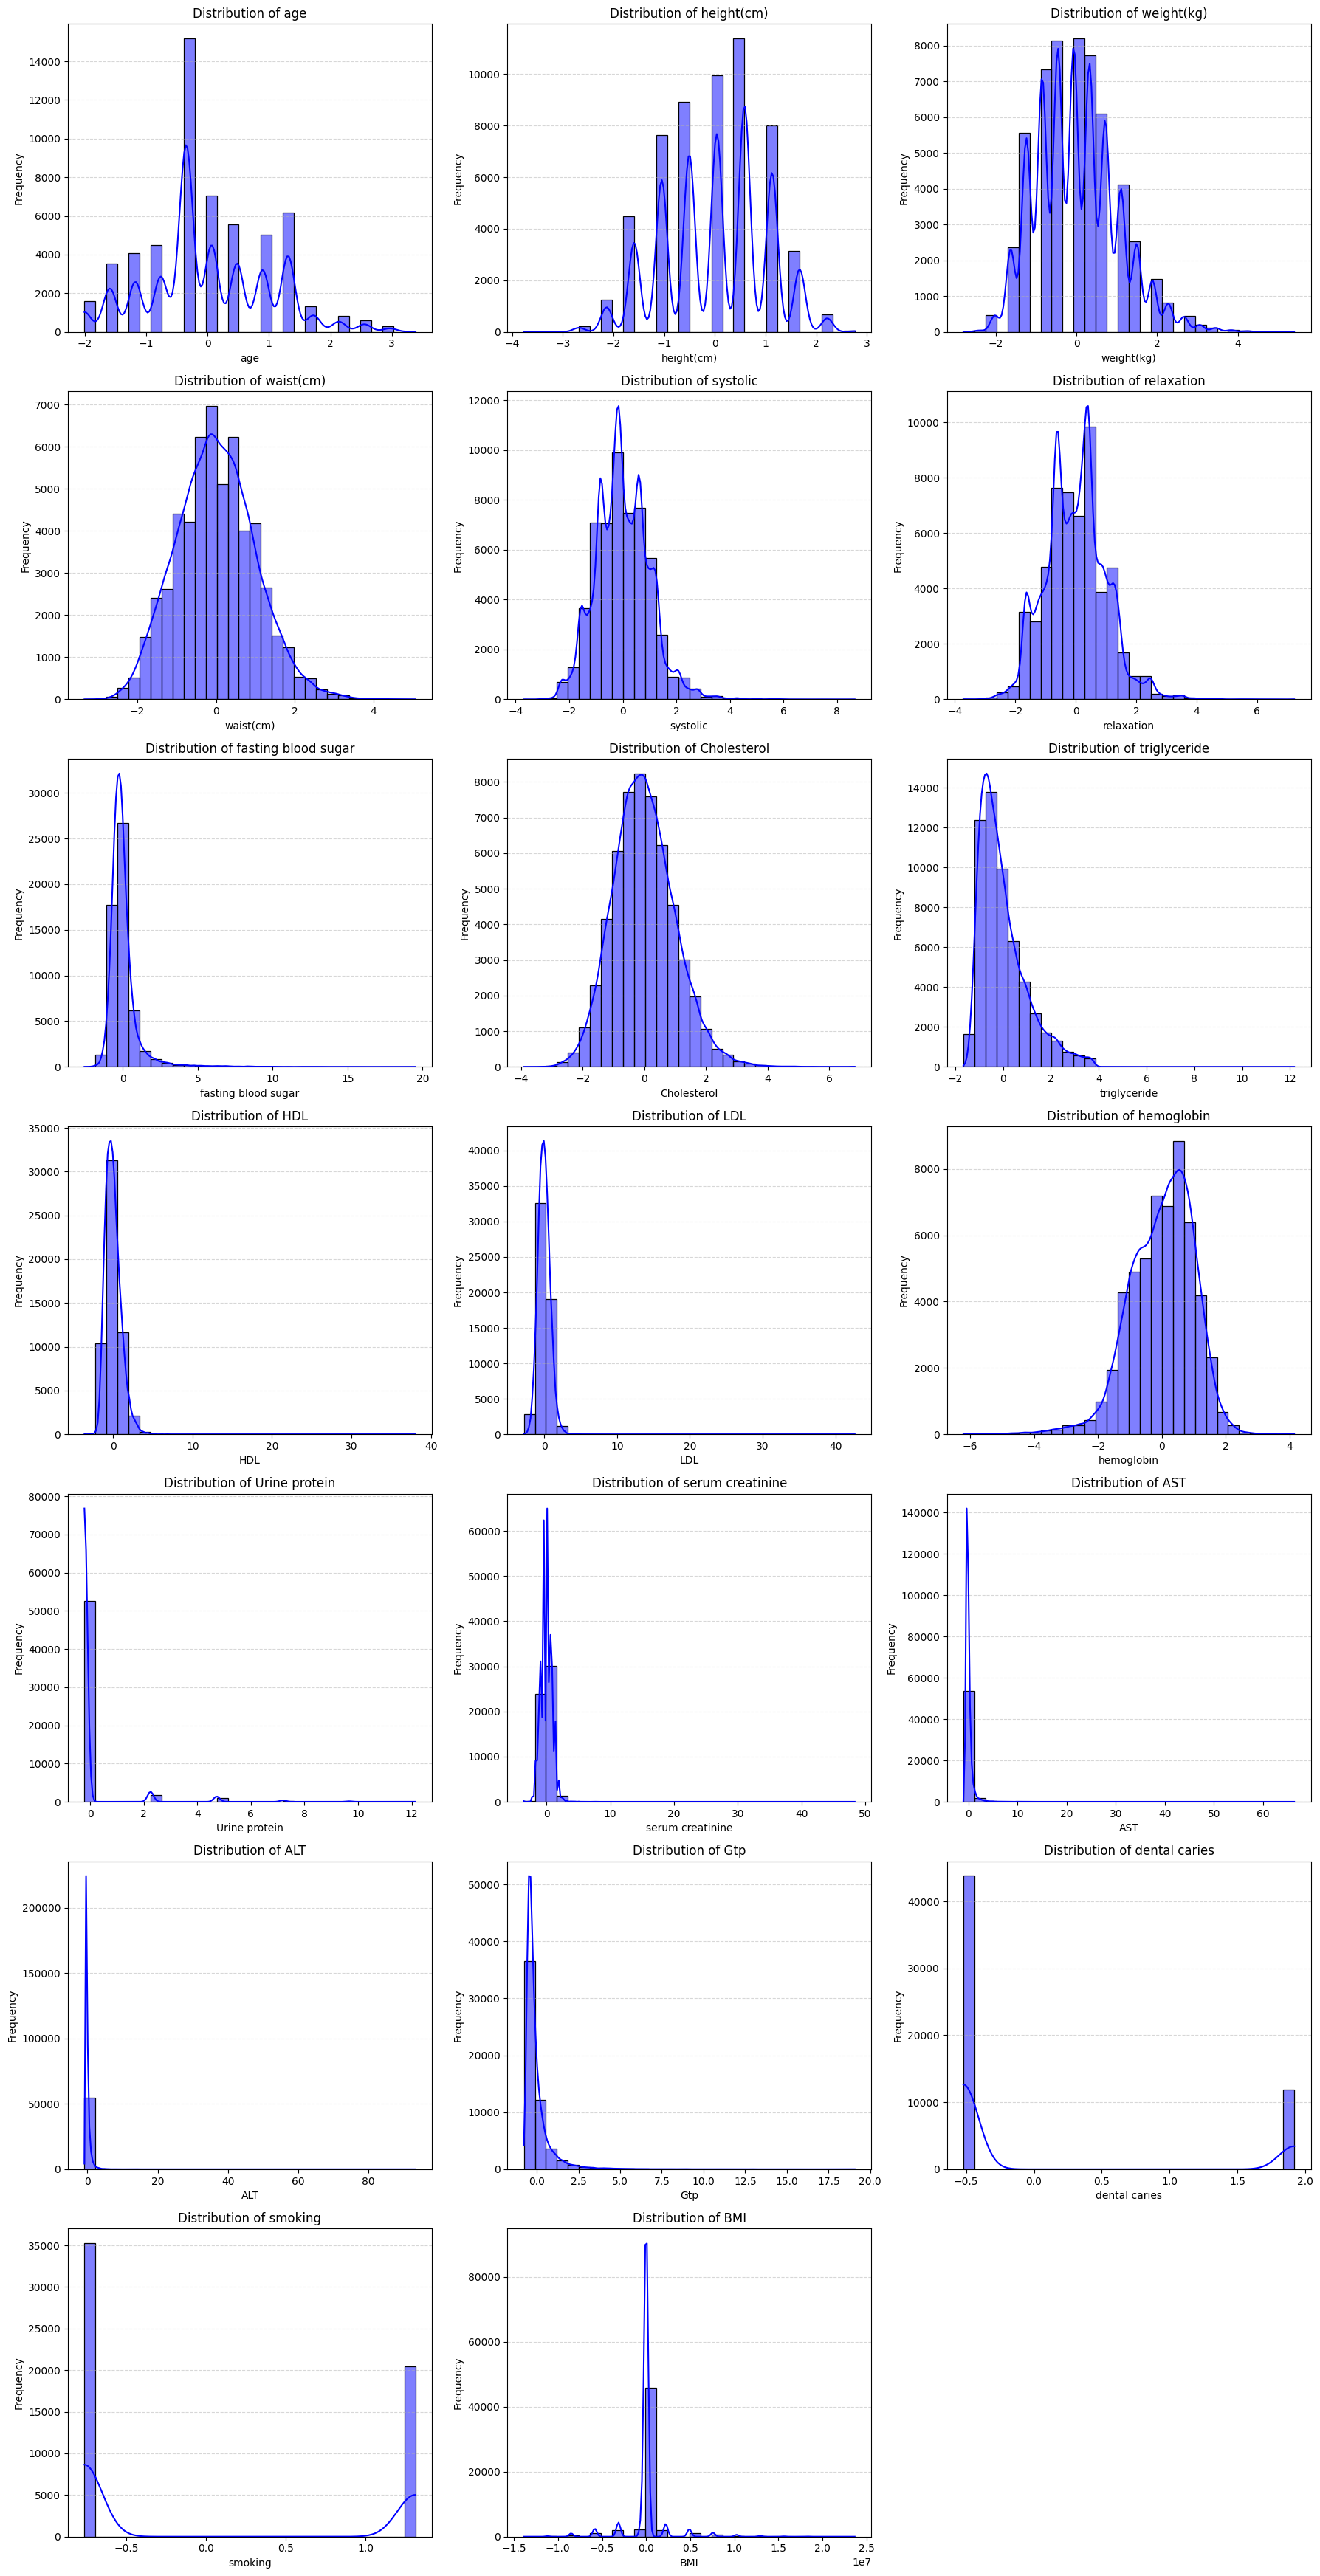

In [8]:
import math

# Ensure BMI is calculated
if 'BMI' not in df.columns:
    df['BMI'] = df['weight(kg)'] / (df['height(cm)'] / 100) ** 2
    print("BMI column created successfully.")

# List of columns to analyze (excluding specified ones)
columns_to_analyze = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'relaxation',
    'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
    'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp',
     'dental caries',  'smoking', 'BMI'
]

# Number of features and grid layout
num_features = len(columns_to_analyze)
cols = 3  # Number of columns in the grid
rows = math.ceil(num_features / cols)  # Determine the number of rows

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()  # Flatten the grid of axes for easy iteration

# Plot each feature's histogram
for i, feature in enumerate(columns_to_analyze):
    sns.histplot(df[feature], kde=True, bins=30, color='blue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("all_feature_histograms.png", dpi=300)
plt.show()


Generating pairplot for group 1: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic']


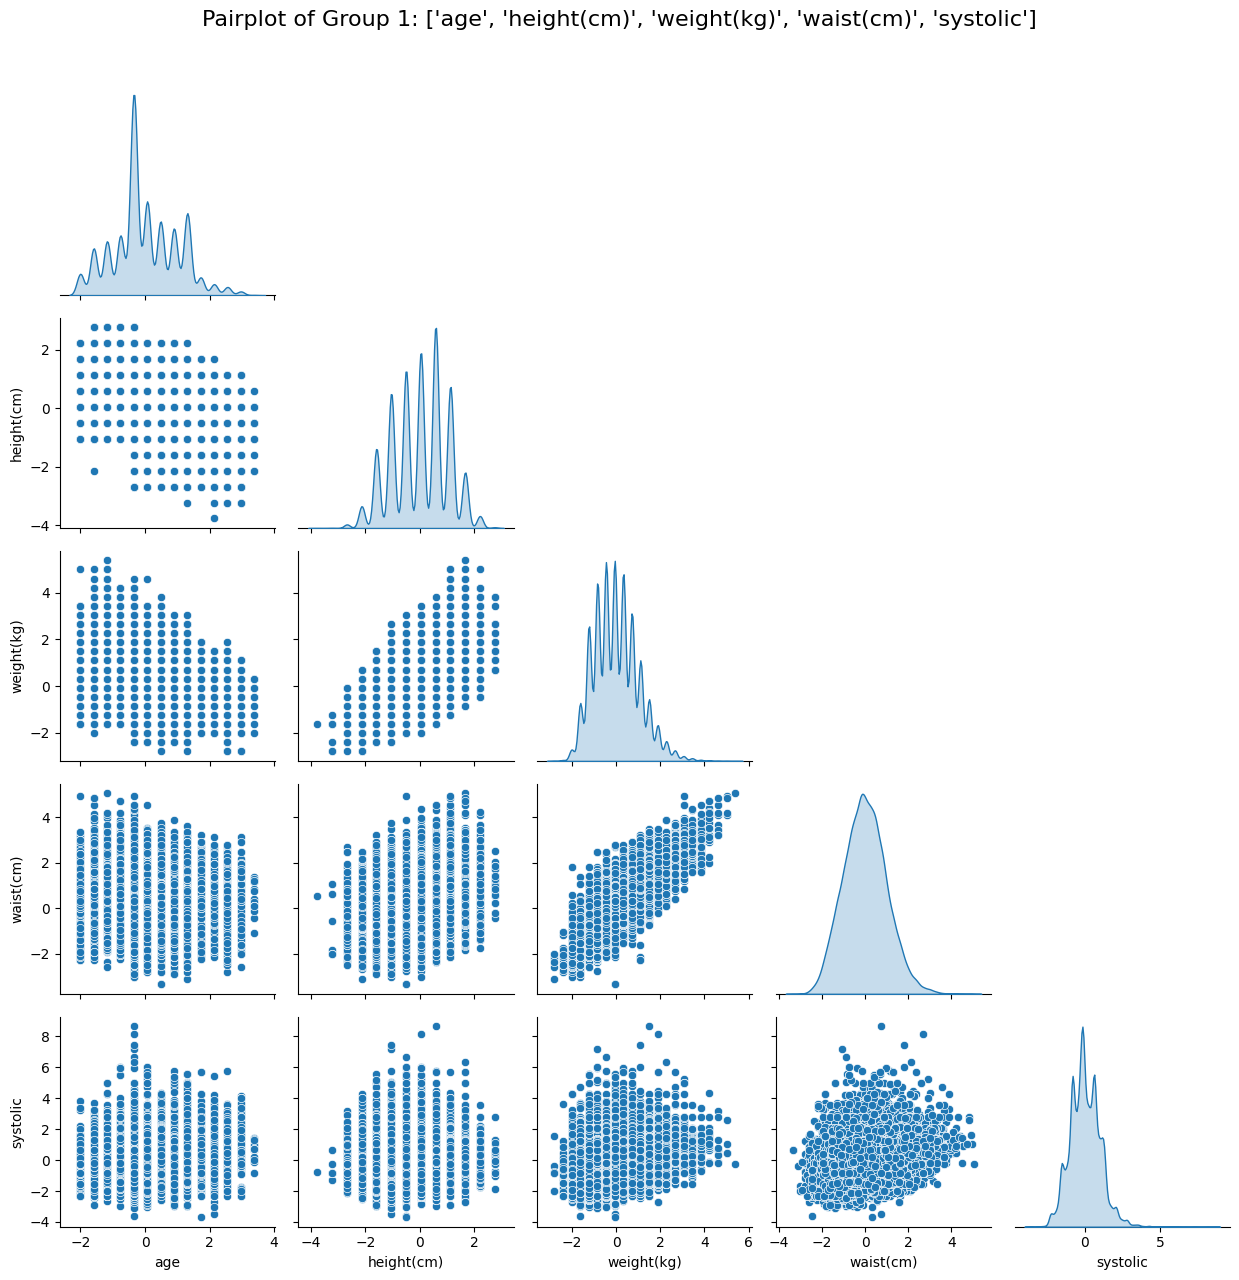

Generating pairplot for group 2: ['relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL']


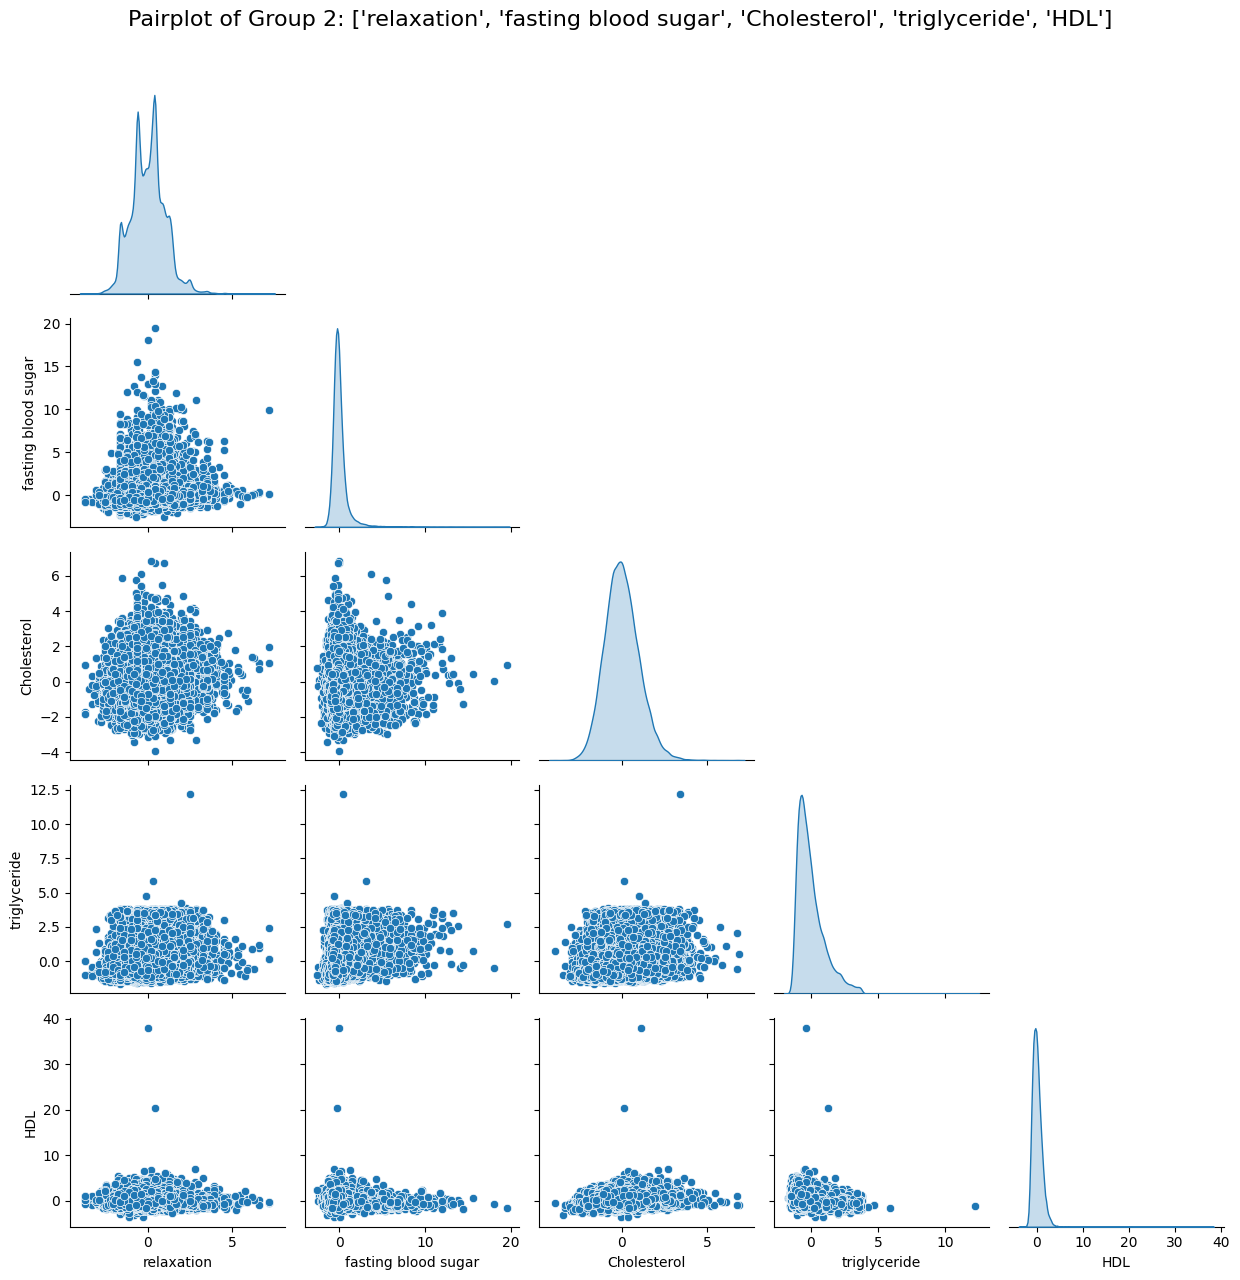

Generating pairplot for group 3: ['LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST']


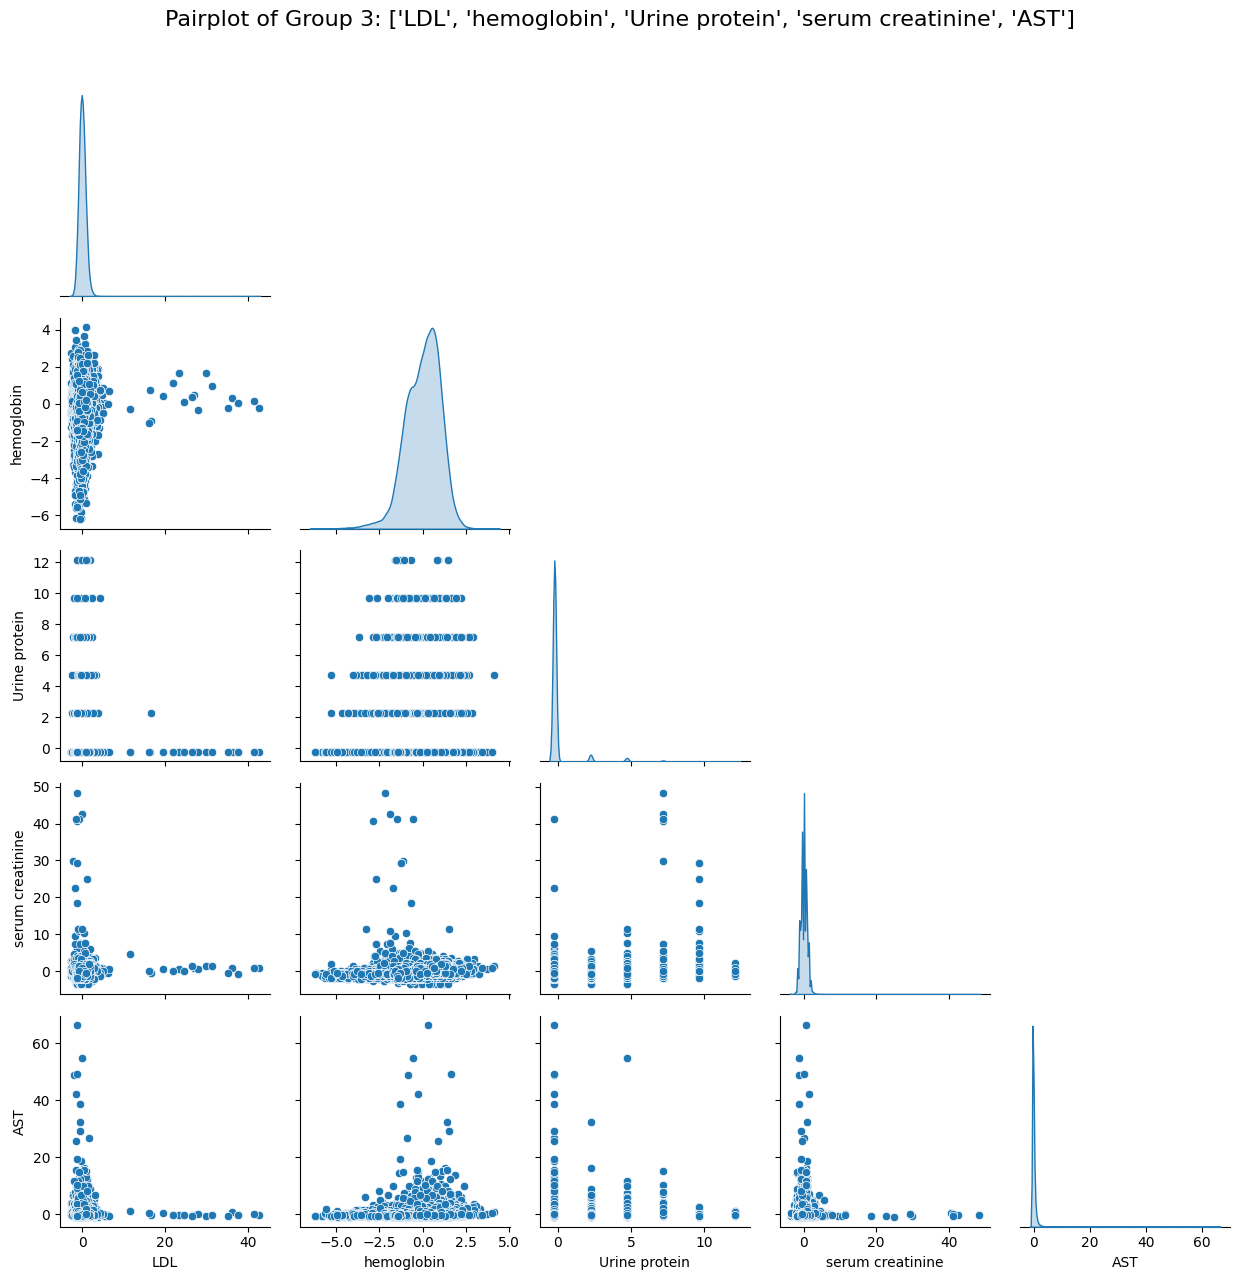

Generating pairplot for group 4: ['ALT', 'Gtp', 'dental caries', 'smoking', 'BMI']


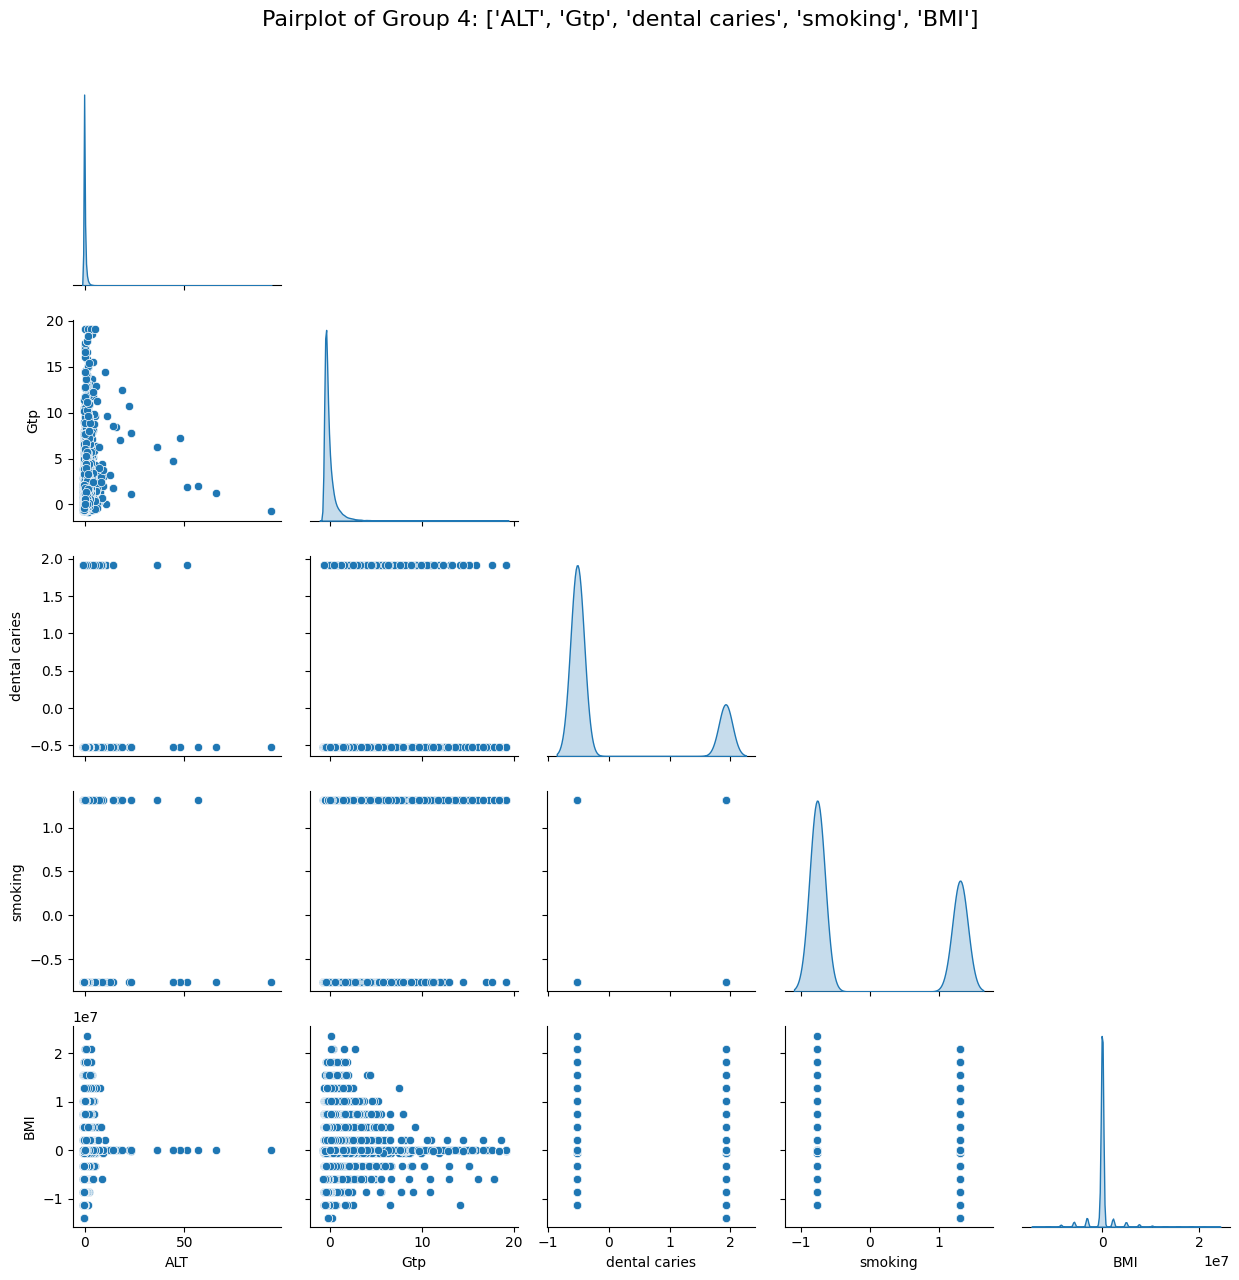

In [9]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to analyze (excluding specified ones)
columns_to_analyze = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'relaxation',
    'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
    'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp',
    'dental caries', 'smoking', 'BMI'
]

# Number of features per pairplot (smaller groups for better visualization)
group_size = 5

# Divide columns into groups of size 'group_size'
groups = [columns_to_analyze[i:i + group_size] for i in range(0, len(columns_to_analyze), group_size)]

# Generate pairplots for each group
for idx, group in enumerate(groups):
    print(f"Generating pairplot for group {idx + 1}: {group}")
    sns.pairplot(df[group], diag_kind='kde', corner=True)
    plt.suptitle(f"Pairplot of Group {idx + 1}: {group}", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.savefig(f"pairplot_group_{idx + 1}.png", dpi=300)
    plt.show()


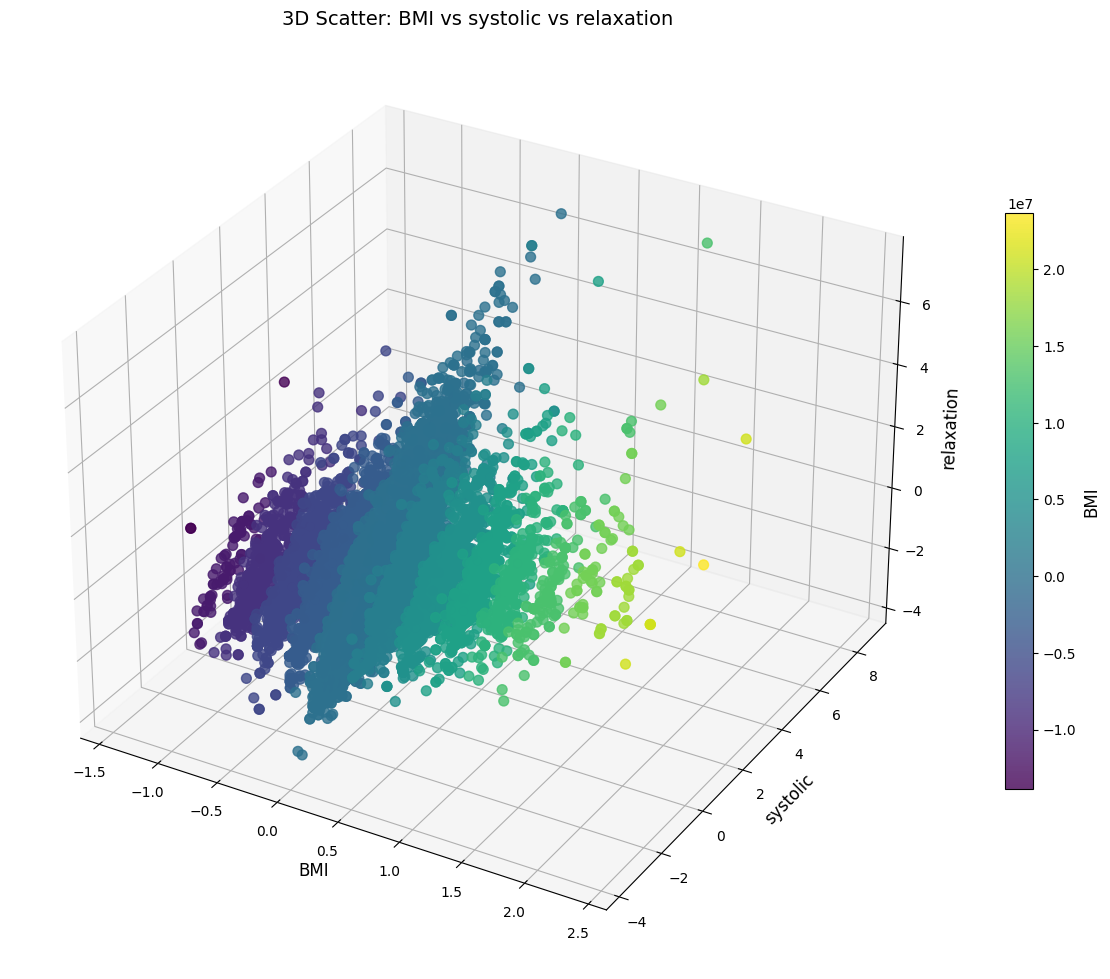

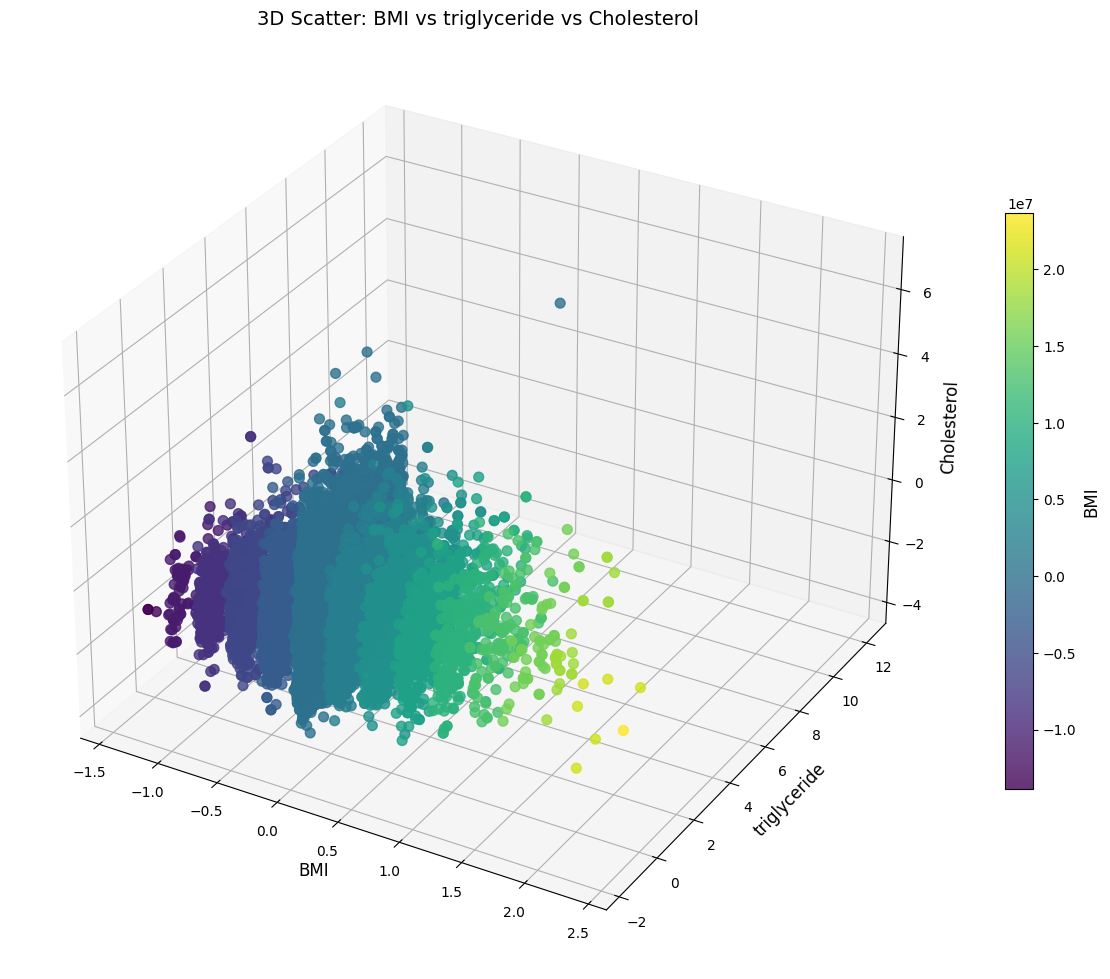

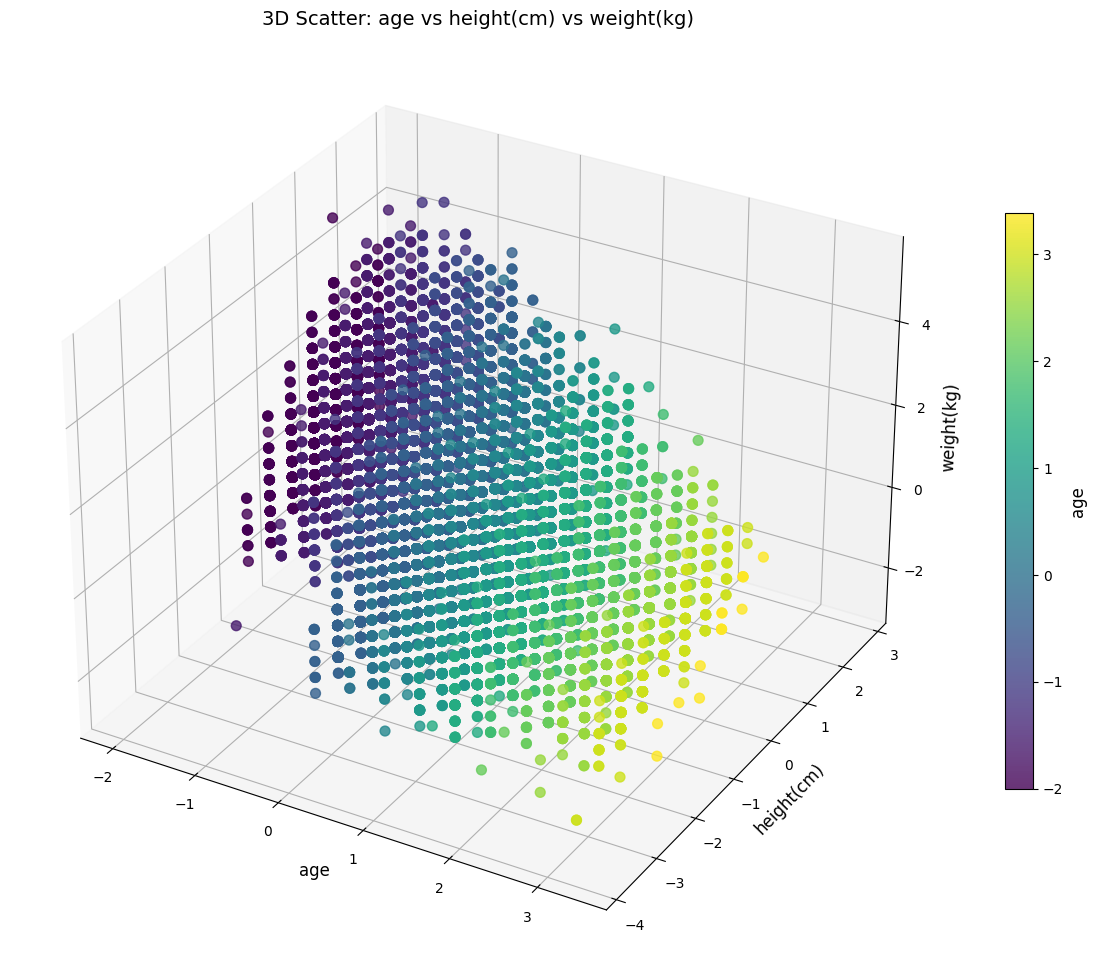

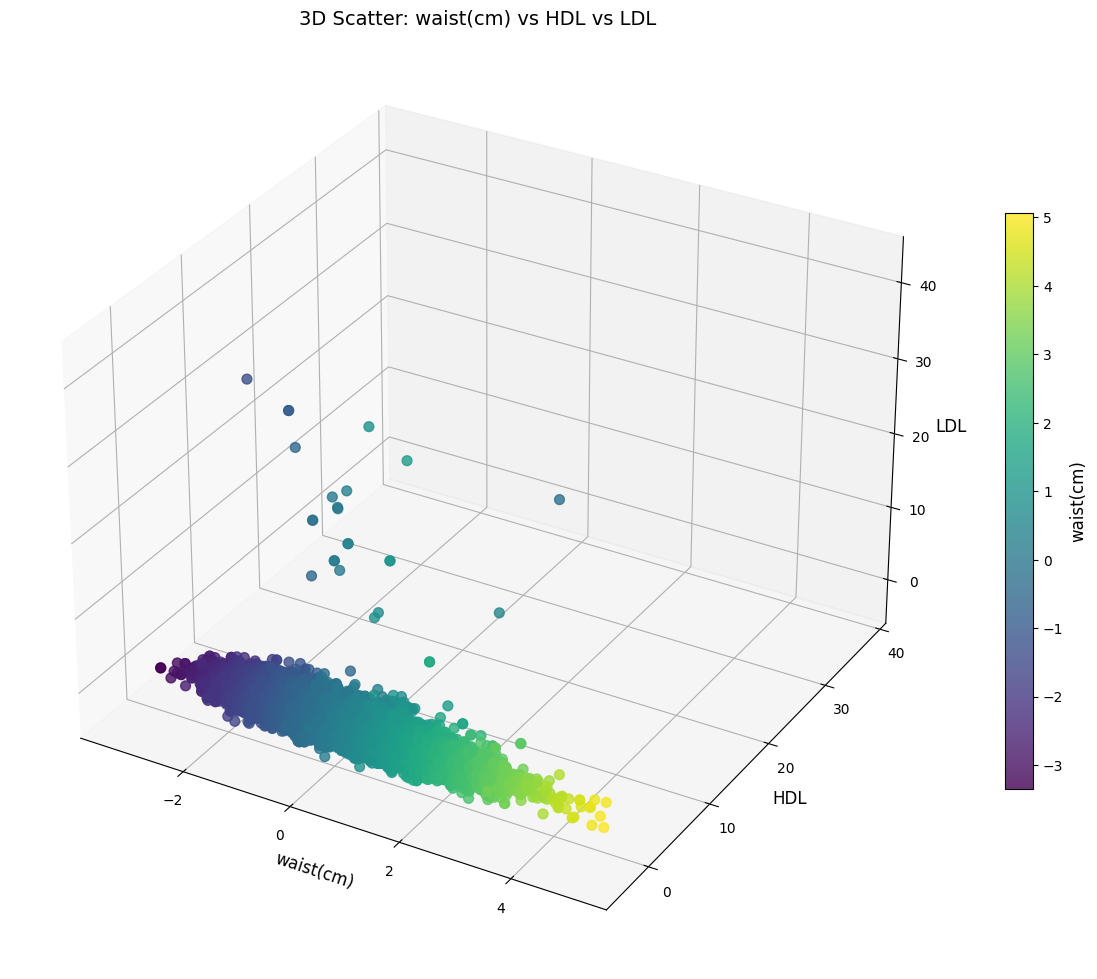

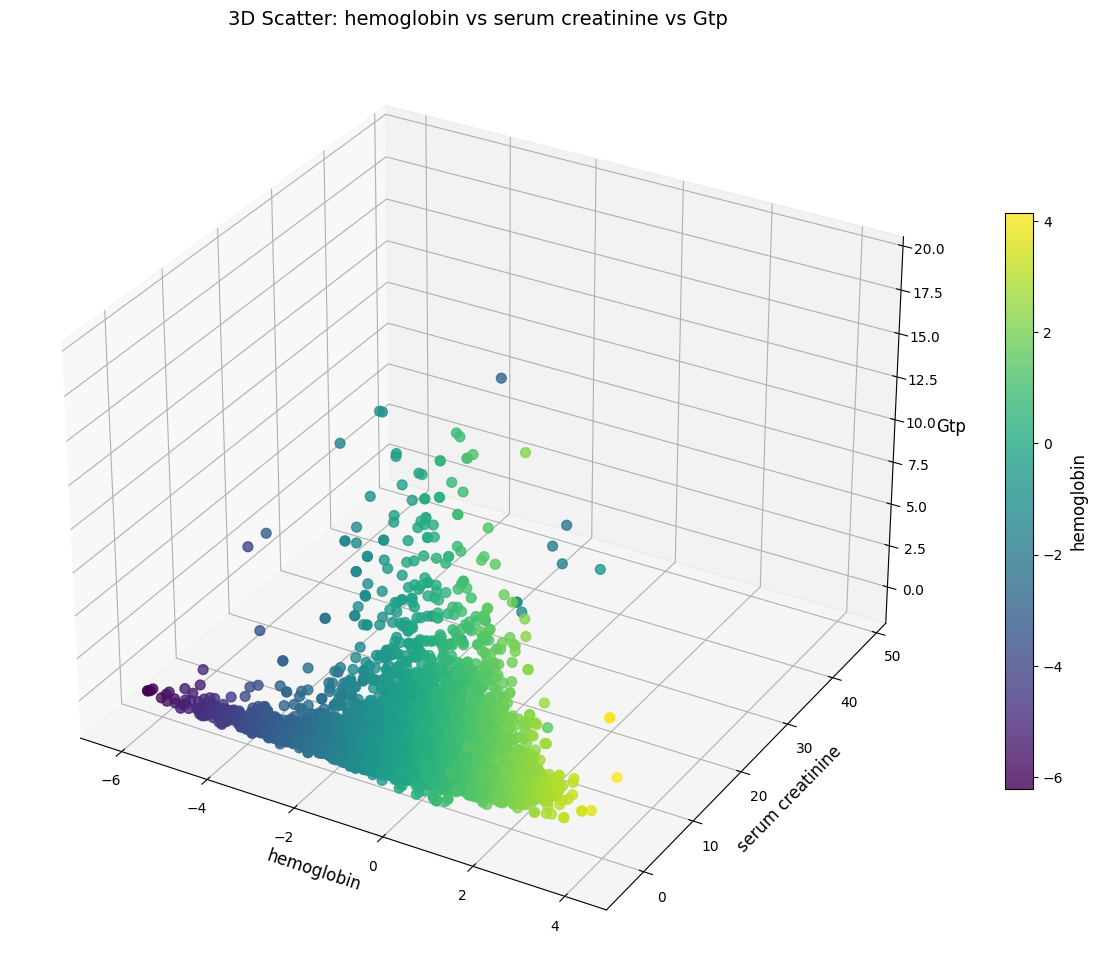

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Define important feature combinations for 3D scatter plots
feature_combinations = [
    ('BMI', 'systolic', 'relaxation'),  # Combination 1
    ('BMI', 'triglyceride', 'Cholesterol'),  # Combination 2
    ('age', 'height(cm)', 'weight(kg)'),  # Combination 3
    ('waist(cm)', 'HDL', 'LDL'),  # Combination 4
    ('hemoglobin', 'serum creatinine', 'Gtp')  # Combination 5
]

# Generate 3D scatter plots for each combination
for idx, (x_feature, y_feature, z_feature) in enumerate(feature_combinations):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot
    sc = ax.scatter(df[x_feature], df[y_feature], df[z_feature], 
                    c=df[x_feature], cmap='viridis', s=50, alpha=0.8)
    
    # Setting labels
    ax.set_xlabel(x_feature, fontsize=12)
    ax.set_ylabel(y_feature, fontsize=12)
    ax.set_zlabel(z_feature, fontsize=12)
    plt.title(f"3D Scatter: {x_feature} vs {y_feature} vs {z_feature}", fontsize=14)
    
    # Add colorbar
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6)
    cbar.set_label(x_feature, fontsize=12)
    
    # Show and save plot
    plt.tight_layout()
    plt.savefig(f"3d_scatter_{x_feature}_vs_{y_feature}_vs_{z_feature}.png", dpi=300)
    plt.show()


In [11]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np

# Preparing the dataset
# Replace 'smoking' with the actual target column name if different
X = df.drop(columns=['smoking'])  
y = df['smoking']

# Scale the features for LASSO to work effectively
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adjust alpha to ensure at least 15 features are selected
lasso = Lasso(alpha=0.01, random_state=42)  # Use a smaller alpha for less regularization
lasso.fit(X_scaled, y)

# Select important features (non-zero coefficients)
lasso_features = X.columns[np.where(lasso.coef_ != 0)]

# Ensure at least 15 features
if len(lasso_features) < 15:
    # Sort features by coefficient magnitude and select the top 15
    top_features_indices = np.argsort(np.abs(lasso.coef_))[-15:]
    lasso_features = X.columns[top_features_indices]

print("Important Features from LASSO:")
print(list(lasso_features))


Important Features from LASSO:
['height(cm)', 'weight(kg)', 'waist(cm)', 'hearing(left)', 'systolic', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'gender_M', 'tartar_Y', 'BMI']


In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Define target variable and features
target_column = 'smoking'  # Replace 'smoking' with your actual target column name
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Step 1: LASSO for Feature Selection
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', LassoCV(cv=5, random_state=42))
])

lasso_pipeline.fit(X, y)

# Extract selected features (non-zero coefficients)
lasso_model = lasso_pipeline.named_steps['lasso']
feature_names = (
    list(numeric_cols) + 
    list(lasso_pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_cols))
)
lasso_features = np.array(feature_names)[np.where(lasso_model.coef_ != 0)]

# Debugging: Print selected features
print(f"Important Features from LASSO ({len(lasso_features)}): {list(lasso_features)}")

# Step 2: Prepare Selected Features for Logistic Regression
X_selected = pd.DataFrame(
    lasso_pipeline.named_steps['preprocessor'].transform(X),
    columns=feature_names
)[lasso_features]

# Binarize target variable if needed
y_binary = (y > 0).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_binary, test_size=0.3, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Output logistic regression metrics
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred))

# Extract weights for formula
coefficients = logreg.coef_[0]
weights = coefficients / np.sum(np.abs(coefficients))  # Normalize weights

# Combine weights with feature names for the formula
feature_weights = pd.DataFrame({'Feature': lasso_features, 'Weight': weights})
print("Feature Weights:")
print(feature_weights)

# Dynamic formula
formula = " + ".join([f"{round(w, 3)} * {f}" for f, w in zip(lasso_features, weights)])
print(f"Dynamic Formula: {formula}")


Important Features from LASSO (25): ['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'gender_F', 'tartar_N', 'tartar_Y']
Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79     10557
           1       0.64      0.69      0.66      6151

    accuracy                           0.74     16708
   macro avg       0.73      0.73      0.73     16708
weighted avg       0.75      0.74      0.75     16708

Feature Weights:
                Feature  Weight
0                    ID    0.00
1                   age   -0.00
2            height(cm)    0.04
3            weight(kg)   -0.02
4             waist(cm)   -0.00
5        eyesight(left)   -0.00
6       eyesight(right)   -0.00
7      

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Convert target variable for Keras
y_train_keras = np.array(y_train)
y_test_keras = np.array(y_test)

# Step 1: Train a Deep Learning Model
input_dim = X_train.shape[1]

deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
deep_model.fit(X_train, y_train_keras, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Extract features from the penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 2: Train XGBoost on Extracted Features
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_features, y_train)

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Normalize weights
normalized_weights = feature_importances / feature_importances.sum()

# Step 3: Define Normal Ranges and Identify Outliers
normal_ranges = {}
outliers = {}

for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    normal_range = (mean - 1.96 * std, mean + 1.96 * std)
    normal_ranges[col] = normal_range
    outliers[col] = df[(df[col] < normal_range[0]) | (df[col] > normal_range[1])]

# Step 4: Apply Penalties for Outliers
penalties = {}

for col in numeric_cols:
    penalty_factor = 1  # Default penalty factor
    for idx, value in outliers[col][col].items():  # Replaced iteritems() with items()
        distance_from_normal = min(abs(value - normal_ranges[col][0]), abs(value - normal_ranges[col][1]))
        penalty = penalty_factor * distance_from_normal
        penalties[idx] = penalties.get(idx, 0) + penalty

# Display results
print("Feature Importances (Normalized):")
for col, weight in zip(numeric_cols, normalized_weights):
    print(f"{col}: {weight:.4f} (Normal Range: {normal_ranges[col]})")

print("\nPenalties for Outliers (Sample):")
print({k: penalties[k] for k in list(penalties.keys())[:5]})  # Display sample penalties

# Step 5: Evaluate Combined Model
y_pred = xgb_model.predict(X_test_features)
print("\nCombined Deep Learning + XGBoost Metrics:")
print(classification_report(y_test, y_pred))


Epoch 1/10
975/975 [==============================] - 3s 2ms/step - loss: 0.4783 - accuracy: 0.7440 - val_loss: 0.4690 - val_accuracy: 0.7513
Epoch 2/10
975/975 [==============================] - 2s 2ms/step - loss: 0.4576 - accuracy: 0.7625 - val_loss: 0.4607 - val_accuracy: 0.7567
Epoch 3/10
975/975 [==============================] - 2s 2ms/step - loss: 0.4534 - accuracy: 0.7648 - val_loss: 0.4598 - val_accuracy: 0.7611
Epoch 4/10
975/975 [==============================] - 2s 2ms/step - loss: 0.4499 - accuracy: 0.7672 - val_loss: 0.4600 - val_accuracy: 0.7581
Epoch 5/10
975/975 [==============================] - 2s 2ms/step - loss: 0.4466 - accuracy: 0.7694 - val_loss: 0.4635 - val_accuracy: 0.7600
Epoch 6/10
975/975 [==============================] - 2s 2ms/step - loss: 0.4439 - accuracy: 0.7714 - val_loss: 0.4608 - val_accuracy: 0.7570
Epoch 7/10
975/975 [==============================] - 2s 2ms/step - loss: 0.4411 - accuracy: 0.7751 - val_loss: 0.4655 - val_accuracy: 0.7572
Epoch 

Epoch 1/30
975/975 [==============================] - 3s 2ms/step - loss: 0.4779 - accuracy: 0.7421 - val_loss: 0.4609 - val_accuracy: 0.7602
Epoch 2/30
975/975 [==============================] - 2s 2ms/step - loss: 0.4583 - accuracy: 0.7597 - val_loss: 0.4576 - val_accuracy: 0.7612
Epoch 3/30
975/975 [==============================] - 2s 2ms/step - loss: 0.4550 - accuracy: 0.7620 - val_loss: 0.4550 - val_accuracy: 0.7617
Epoch 4/30
975/975 [==============================] - 2s 2ms/step - loss: 0.4507 - accuracy: 0.7664 - val_loss: 0.4559 - val_accuracy: 0.7614
Epoch 5/30
975/975 [==============================] - 2s 2ms/step - loss: 0.4476 - accuracy: 0.7678 - val_loss: 0.4518 - val_accuracy: 0.7661
Epoch 6/30
975/975 [==============================] - 2s 2ms/step - loss: 0.4450 - accuracy: 0.7734 - val_loss: 0.4543 - val_accuracy: 0.7671
Epoch 7/30
975/975 [==============================] - 2s 2ms/step - loss: 0.4415 - accuracy: 0.7731 - val_loss: 0.4587 - val_accuracy: 0.7666
Epoch 

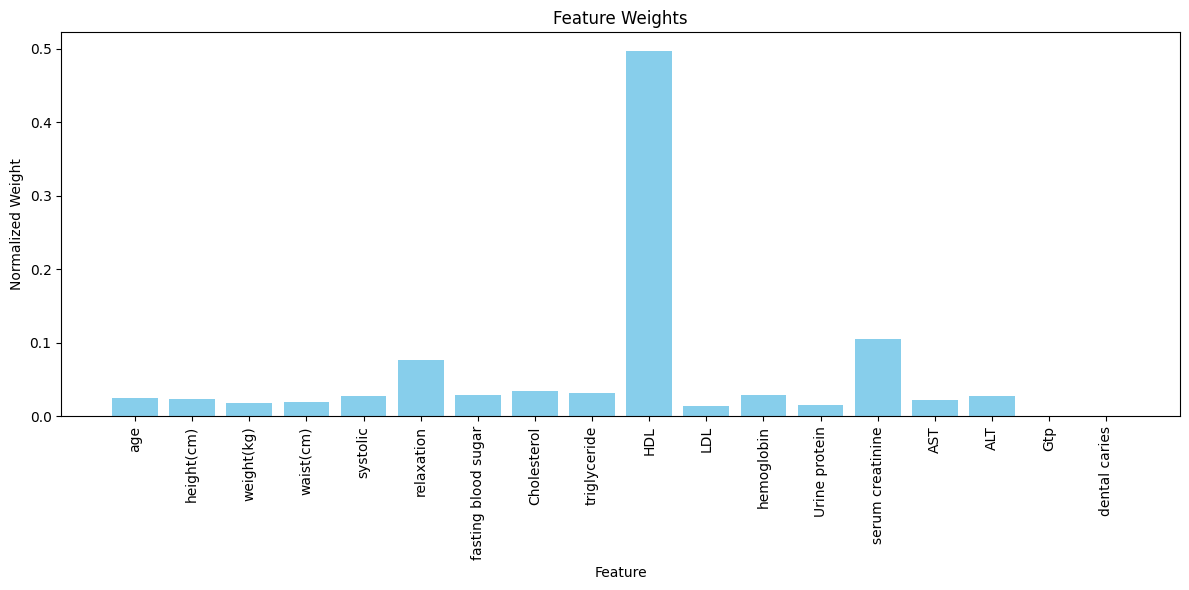

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Convert target variable for Keras
y_train_keras = np.array(y_train)
y_test_keras = np.array(y_test)

# Step 1: Train a Deep Learning Model
input_dim = X_train.shape[1]

deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping to prevent overfitting
history = deep_model.fit(
    X_train, y_train_keras,
    epochs=30,  # Increased epochs for better training
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Extract features from the penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 2: Train XGBoost on Extracted Features
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_features, y_train)

# Get feature importances and normalize them
feature_importances = xgb_model.feature_importances_
normalized_weights = feature_importances / feature_importances.sum()

# Map normalized weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}

# Handle columns not included in the mapped weights
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0  # Assign a weight of 0 for missing columns

# Step 3: Define Normal Ranges and Identify Outliers
normal_ranges = {}
outliers = {}

for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    normal_range = (mean - 1.96 * std, mean + 1.96 * std)
    normal_ranges[col] = normal_range
    outliers[col] = df[(df[col] < normal_range[0]) | (df[col] > normal_range[1])]

# Step 4: Apply Penalties for Outliers
penalties = {}

for col in numeric_cols:
    penalty_factor = 1  # Default penalty factor
    for idx, value in outliers[col][col].items():
        distance_from_normal = min(abs(value - normal_ranges[col][0]), abs(value - normal_ranges[col][1]))
        penalty = penalty_factor * distance_from_normal
        penalties[idx] = penalties.get(idx, 0) + penalty

# Create the formula as a weighted sum with penalties applied
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        value = row[col]
        penalty = penalties.get(row.name, 0)
        if normal_ranges[col][0] <= value <= normal_ranges[col][1]:
            score += value * weight
        else:
            score += (value - penalty) * weight
    return max(1, min(100, score))  # Clamp between 1 and 100

# Apply the formula to the dataset
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Step 5: Display results in tabular form
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [normal_ranges[col] for col in numeric_cols]
})

print("Feature Weights and Ranges:")
print(results)

# Step 6: Evaluate Combined Model
y_pred = xgb_model.predict(X_test_features)
print("\nCombined Deep Learning + XGBoost Metrics:")
print(classification_report(y_test, y_pred))

# Save table and plot
results.to_csv("feature_weights_and_ranges.csv", index=False)

plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.savefig("feature_weights.png")
plt.show()


Epoch 1/30
975/975 [==============================] - 3s 2ms/step - loss: 0.4785 - accuracy: 0.7409 - val_loss: 0.4612 - val_accuracy: 0.7595
Epoch 2/30
975/975 [==============================] - 2s 2ms/step - loss: 0.4595 - accuracy: 0.7577 - val_loss: 0.4566 - val_accuracy: 0.7553
Epoch 3/30
975/975 [==============================] - 2s 2ms/step - loss: 0.4542 - accuracy: 0.7636 - val_loss: 0.4553 - val_accuracy: 0.7611
Epoch 4/30
975/975 [==============================] - 2s 2ms/step - loss: 0.4508 - accuracy: 0.7684 - val_loss: 0.4559 - val_accuracy: 0.7625
Epoch 5/30
975/975 [==============================] - 2s 2ms/step - loss: 0.4471 - accuracy: 0.7692 - val_loss: 0.4520 - val_accuracy: 0.7649
Epoch 6/30
975/975 [==============================] - 2s 2ms/step - loss: 0.4444 - accuracy: 0.7725 - val_loss: 0.4537 - val_accuracy: 0.7630
Epoch 7/30
975/975 [==============================] - 2s 2ms/step - loss: 0.4416 - accuracy: 0.7739 - val_loss: 0.4512 - val_accuracy: 0.7612
Epoch 

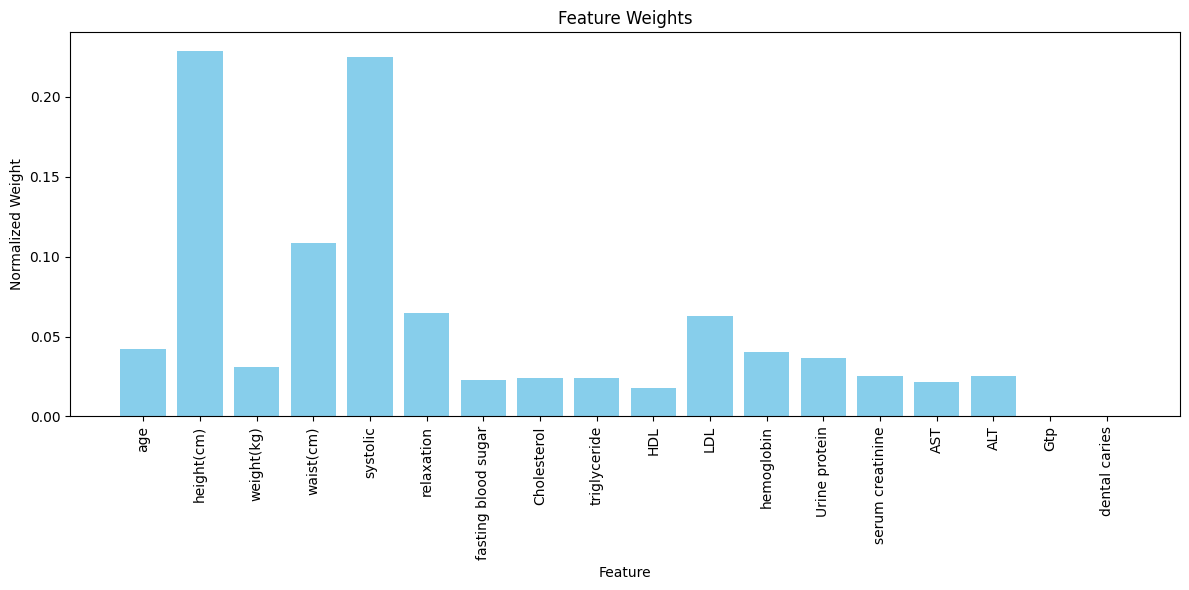

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Convert target variable for Keras
y_train_keras = np.array(y_train)
y_test_keras = np.array(y_test)

# Step 1: Train a Deep Learning Model
input_dim = X_train.shape[1]

deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = deep_model.fit(
    X_train, y_train_keras,
    epochs=30,  # Adjust epochs
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Extract features from the penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 2: Train XGBoost on Extracted Features
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_features, y_train)

# Get feature importances and normalize them
feature_importances = xgb_model.feature_importances_
normalized_weights = feature_importances / feature_importances.sum()

# Map normalized weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}

# Handle columns not included in the mapped weights
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0  # Assign a weight of 0 for missing columns

# Step 3: Define Normal Ranges and Threshold-Based Penalties
thresholds = {
    'Cholesterol': [(0, 200), (200, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (150, 199), (200, 499), (500, float('inf'))],
    'systolic': [(90, 120), (120, 139), (140, float('inf'))],
    'relaxation': [(60, 80), (80, 89), (90, float('inf'))]
}

# Generate penalties dynamically based on thresholds
penalty_factors = {
    'Cholesterol': [0, 0.2, 0.5, 1],
    'triglyceride': [0, 0.3, 0.6, 1],
    'systolic': [0, 0.1, 0.5],
    'relaxation': [0, 0.2, 0.6]
}

# Calculate penalties based on thresholds
def calculate_penalty(value, col):
    for idx, (low, high) in enumerate(thresholds[col]):
        if low <= value <= high:
            return penalty_factors[col][idx]
    return 0  # Default penalty

# Create the formula as a weighted sum with penalties applied
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        value = row[col]
        penalty = calculate_penalty(value, col) if col in thresholds else 0
        if normal_ranges[col][0] <= value <= normal_ranges[col][1]:
            score += value * weight
        else:
            score += (value - penalty) * weight
    return max(1, min(100, score))  # Clamp between 1 and 100

# Apply the formula to the dataset
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Display results in tabular form
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else normal_ranges[col] for col in numeric_cols]
})

print("Feature Weights, Ranges, and Penalties:")
print(results)

# Step 5: Evaluate Combined Model
y_pred = xgb_model.predict(X_test_features)
print("\nCombined Deep Learning + XGBoost Metrics:")
print(classification_report(y_test, y_pred))

# Save table and plot
results.to_csv("feature_weights_and_ranges.csv", index=False)

plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.savefig("feature_weights.png")
plt.show()


Epoch 1/20
975/975 [==============================] - 4s 3ms/step - loss: 0.4767 - accuracy: 0.7456 - val_loss: 0.4645 - val_accuracy: 0.7512
Epoch 2/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4597 - accuracy: 0.7579 - val_loss: 0.4559 - val_accuracy: 0.7614
Epoch 3/20
975/975 [==============================] - 2s 3ms/step - loss: 0.4538 - accuracy: 0.7645 - val_loss: 0.4549 - val_accuracy: 0.7653
Epoch 4/20
975/975 [==============================] - 2s 3ms/step - loss: 0.4509 - accuracy: 0.7684 - val_loss: 0.4563 - val_accuracy: 0.7593
Epoch 5/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4467 - accuracy: 0.7716 - val_loss: 0.4556 - val_accuracy: 0.7656
Epoch 6/20
975/975 [==============================] - 2s 2ms/step - loss: 0.4433 - accuracy: 0.7726 - val_loss: 0.4528 - val_accuracy: 0.7654
Epoch 7/20
975/975 [==============================] - 2s 2ms/step - loss: 0.4397 - accuracy: 0.7785 - val_loss: 0.4517 - val_accuracy: 0.7657
Epoch 

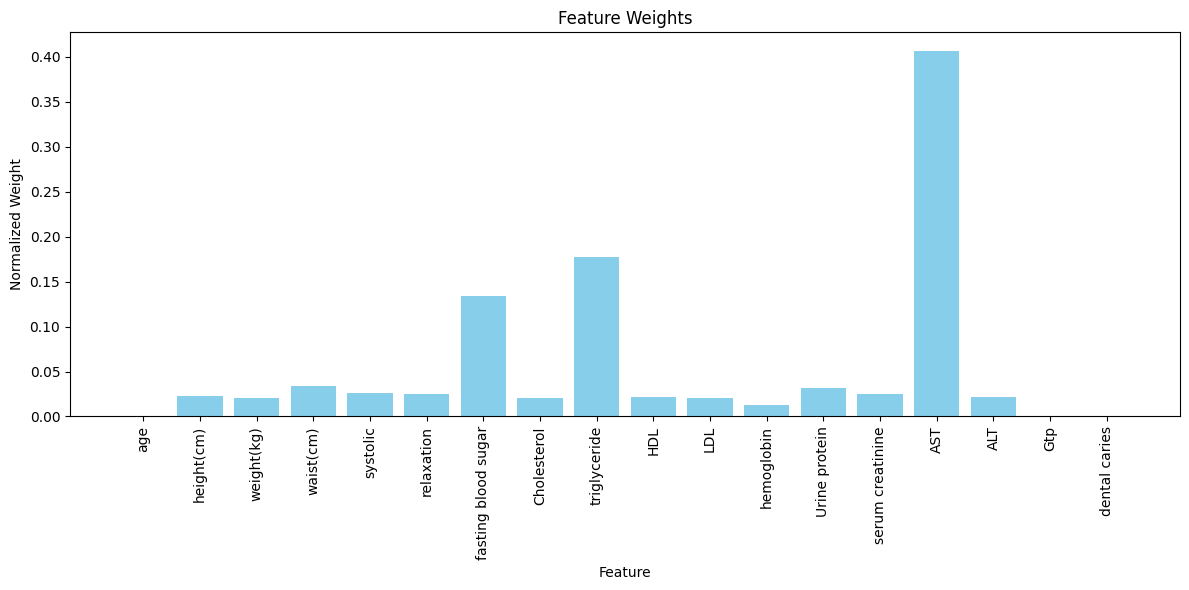

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Step 1: Train a Deep Learning Model
input_dim = X_train.shape[1]

deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = deep_model.fit(
    X_train, y_train, 
    epochs=20,  # Adjusted to avoid overfitting
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Extract features from the penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 2: Train XGBoost on Extracted Features
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_features, y_train)

# Get feature importances and normalize them
feature_importances = xgb_model.feature_importances_
normalized_weights = feature_importances / feature_importances.sum()

# Map normalized weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}

# Handle columns not included in the mapped weights
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0  # Assign a weight of 0 for missing columns

# Define Normal Ranges
thresholds = {
    'Cholesterol': [(0, 200), (200, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (150, 199), (200, 499), (500, float('inf'))],
    'systolic': [(90, 120), (120, 139), (140, float('inf'))],
    'relaxation': [(60, 80), (80, 89), (90, float('inf'))]
}

# Generate penalties dynamically based on thresholds
penalty_factors = {
    'Cholesterol': [0, 0.2, 0.5, 1],
    'triglyceride': [0, 0.3, 0.6, 1],
    'systolic': [0, 0.1, 0.5],
    'relaxation': [0, 0.2, 0.6]
}

# Calculate penalties based on thresholds
def calculate_penalty(value, col):
    if col in thresholds:
        for idx, (low, high) in enumerate(thresholds[col]):
            if low <= value <= high:
                return penalty_factors[col][idx]
    return 0

# Calculate health score
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        if col in thresholds:
            value = row[col]
            penalty = calculate_penalty(value, col)
            score += (value * weight) - penalty
    return max(1, min(100, score))  # Clamp between 1 and 100

# Apply the formula to the dataset
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Display Feature Weights and Health Scores
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else "Not Defined" for col in numeric_cols]
})

print("\nFeature Weights, Ranges, and Penalties:")
print(results)

# Evaluation Metrics
y_pred = xgb_model.predict(X_test_features)
print("\nCombined Deep Learning + XGBoost Metrics:")
print(classification_report(y_test, y_pred))

# Plot Feature Weights
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Save results
results.to_csv("feature_weights_and_health_scores.csv", index=False)


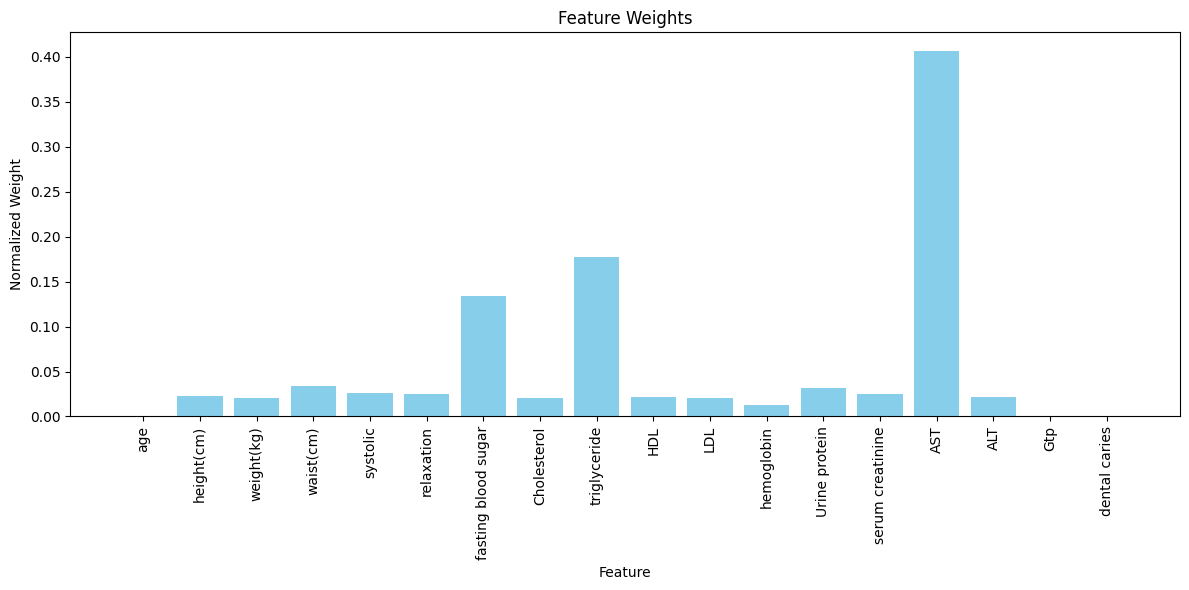


Dynamic Formula:
Health Score = 0.02 * height(cm) + 0.02 * weight(kg) + 0.03 * waist(cm) + 0.03 * systolic + 0.02 * relaxation + 0.13 * fasting blood sugar + 0.02 * Cholesterol + 0.18 * triglyceride + 0.02 * HDL + 0.02 * LDL + 0.01 * hemoglobin + 0.03 * Urine protein + 0.03 * serum creatinine + 0.41 * AST + 0.02 * ALT


In [29]:
# Plot Feature Weights
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Generate the dynamic formula
dynamic_formula = []
for col, weight in mapped_weights.items():
    if weight > 0:  # Include only features with non-zero weights
        dynamic_formula.append(f"{weight:.2f} * {col}")

# Combine the formula components into a single string
formula_str = " + ".join(dynamic_formula)

# Display the dynamic formula
print("\nDynamic Formula:")
print(f"Health Score = {formula_str}")

# Save results and formula
results.to_csv("feature_weights_and_health_scores.csv", index=False)
with open("dynamic_formula.txt", "w") as f:
    f.write(f"Health Score = {formula_str}")


Epoch 1/20
975/975 [==============================] - 4s 3ms/step - loss: 0.4779 - accuracy: 0.7428 - val_loss: 0.4622 - val_accuracy: 0.7559
Epoch 2/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4594 - accuracy: 0.7581 - val_loss: 0.4571 - val_accuracy: 0.7627
Epoch 3/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4549 - accuracy: 0.7636 - val_loss: 0.4556 - val_accuracy: 0.7626
Epoch 4/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4517 - accuracy: 0.7658 - val_loss: 0.4574 - val_accuracy: 0.7618
Epoch 5/20
975/975 [==============================] - 2s 2ms/step - loss: 0.4486 - accuracy: 0.7678 - val_loss: 0.4548 - val_accuracy: 0.7649
Epoch 6/20
975/975 [==============================] - 2s 2ms/step - loss: 0.4454 - accuracy: 0.7708 - val_loss: 0.4526 - val_accuracy: 0.7593
Epoch 7/20
975/975 [==============================] - 2s 2ms/step - loss: 0.4436 - accuracy: 0.7738 - val_loss: 0.4537 - val_accuracy: 0.7671
Epoch 

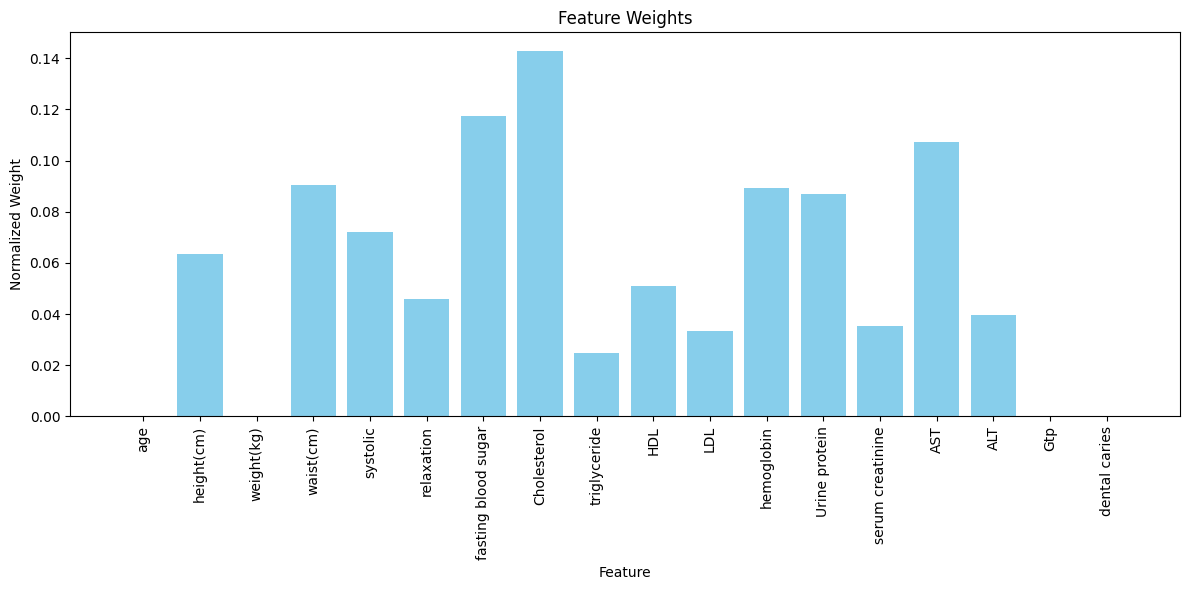

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Step 1: Train a Deep Learning Model
input_dim = X_train.shape[1]

deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = deep_model.fit(
    X_train, y_train,
    epochs=20,  # Adjusted to avoid overfitting
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Extract features from the penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 2: Train SVM on Extracted Features
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_features, y_train)

# Get feature importances (weights) from SVM coefficients for linear kernel
svm_weights = np.abs(svm_model.coef_).flatten()
normalized_weights = svm_weights / svm_weights.sum()

# Map normalized weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}

# Handle columns not included in the mapped weights
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0  # Assign a weight of 0 for missing columns

# Define Normal Ranges
thresholds = {
    'Cholesterol': [(0, 200), (200, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (150, 199), (200, 499), (500, float('inf'))],
    'systolic': [(90, 120), (120, 139), (140, float('inf'))],
    'relaxation': [(60, 80), (80, 89), (90, float('inf'))]
}

# Calculate health score
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        value = row[col]
        score += value * weight  # Use weights directly for simplicity
    return max(1, min(100, score))  # Clamp between 1 and 100

# Apply the formula to the dataset
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Display Feature Weights and Health Scores
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else "Not Defined" for col in numeric_cols]
})

print("\nFeature Weights, Ranges, and Penalties:")
print(results)

# Evaluation Metrics
y_pred = svm_model.predict(X_test_features)
print("\nSVM Metrics:")
print(classification_report(y_test, y_pred))

# Plot Feature Weights
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Save results
results.to_csv("feature_weights_and_health_scores_svm.csv", index=False)


Epoch 1/20
975/975 [==============================] - 4s 3ms/step - loss: 0.4769 - accuracy: 0.7426 - val_loss: 0.4618 - val_accuracy: 0.7564
Epoch 2/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4600 - accuracy: 0.7603 - val_loss: 0.4572 - val_accuracy: 0.7625
Epoch 3/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4541 - accuracy: 0.7648 - val_loss: 0.4566 - val_accuracy: 0.7658
Epoch 4/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4511 - accuracy: 0.7683 - val_loss: 0.4588 - val_accuracy: 0.7629
Epoch 5/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4481 - accuracy: 0.7691 - val_loss: 0.4526 - val_accuracy: 0.7672
Epoch 6/20
975/975 [==============================] - 2s 2ms/step - loss: 0.4442 - accuracy: 0.7733 - val_loss: 0.4529 - val_accuracy: 0.7667
Epoch 7/20
975/975 [==============================] - 2s 2ms/step - loss: 0.4411 - accuracy: 0.7752 - val_loss: 0.4592 - val_accuracy: 0.7595
Epoch 

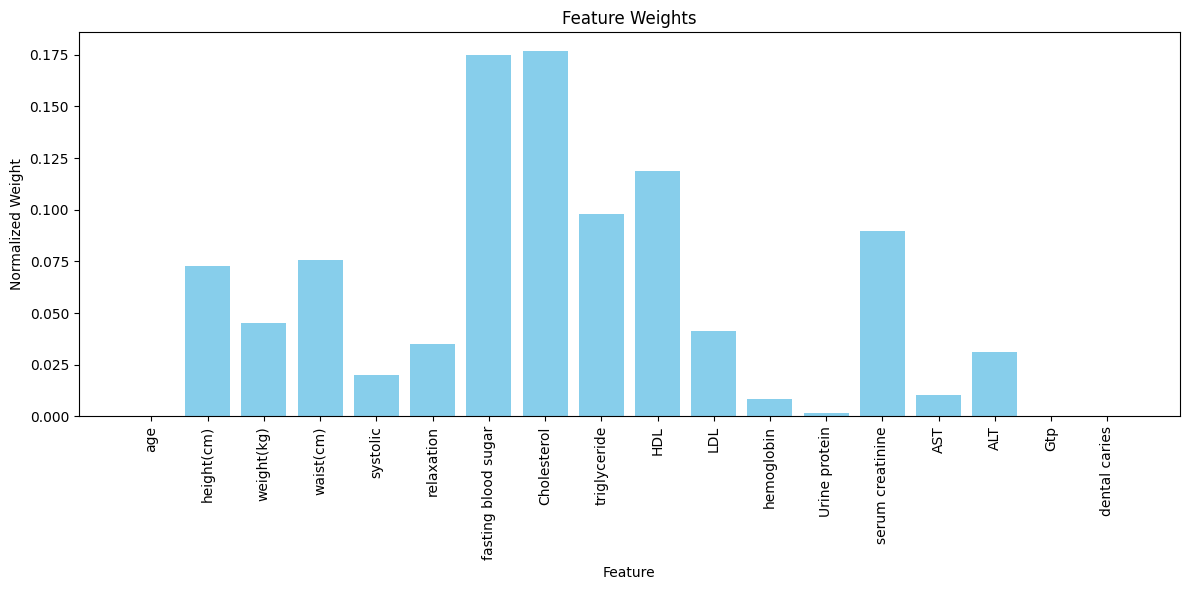

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Step 1: Train a Deep Learning Model
input_dim = X_train.shape[1]

deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = deep_model.fit(
    X_train, y_train,
    epochs=20,  # Adjusted to avoid overfitting
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Extract features from the penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 2: Train Random Forest on Extracted Features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Get feature importances and normalize them
feature_importances = rf_model.feature_importances_
normalized_weights = feature_importances / feature_importances.sum()

# Map normalized weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}

# Handle columns not included in the mapped weights
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0  # Assign a weight of 0 for missing columns

# Define Normal Ranges
thresholds = {
    'Cholesterol': [(0, 200), (200, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (150, 199), (200, 499), (500, float('inf'))],
    'systolic': [(90, 120), (120, 139), (140, float('inf'))],
    'relaxation': [(60, 80), (80, 89), (90, float('inf'))]
}

# Calculate health score
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        value = row[col]
        score += value * weight  # Use weights directly for simplicity
    return max(1, min(100, score))  # Clamp between 1 and 100

# Apply the formula to the dataset
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Display Feature Weights and Health Scores
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else "Not Defined" for col in numeric_cols]
})

print("\nFeature Weights, Ranges, and Penalties:")
print(results)

# Evaluation Metrics
y_pred = rf_model.predict(X_test_features)
print("\nRandom Forest Metrics:")
print(classification_report(y_test, y_pred))

# Plot Feature Weights
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Save results
results.to_csv("feature_weights_and_health_scores_rf.csv", index=False)


Epoch 1/20
975/975 [==============================] - 4s 3ms/step - loss: 0.4765 - accuracy: 0.7439 - val_loss: 0.4611 - val_accuracy: 0.7584
Epoch 2/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4599 - accuracy: 0.7577 - val_loss: 0.4566 - val_accuracy: 0.7621
Epoch 3/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4544 - accuracy: 0.7645 - val_loss: 0.4556 - val_accuracy: 0.7661
Epoch 4/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4515 - accuracy: 0.7666 - val_loss: 0.4599 - val_accuracy: 0.7636
Epoch 5/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4484 - accuracy: 0.7677 - val_loss: 0.4571 - val_accuracy: 0.7639
Epoch 6/20
975/975 [==============================] - 2s 2ms/step - loss: 0.4464 - accuracy: 0.7719 - val_loss: 0.4530 - val_accuracy: 0.7672
Epoch 7/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4425 - accuracy: 0.7741 - val_loss: 0.4531 - val_accuracy: 0.7599
Epoch 

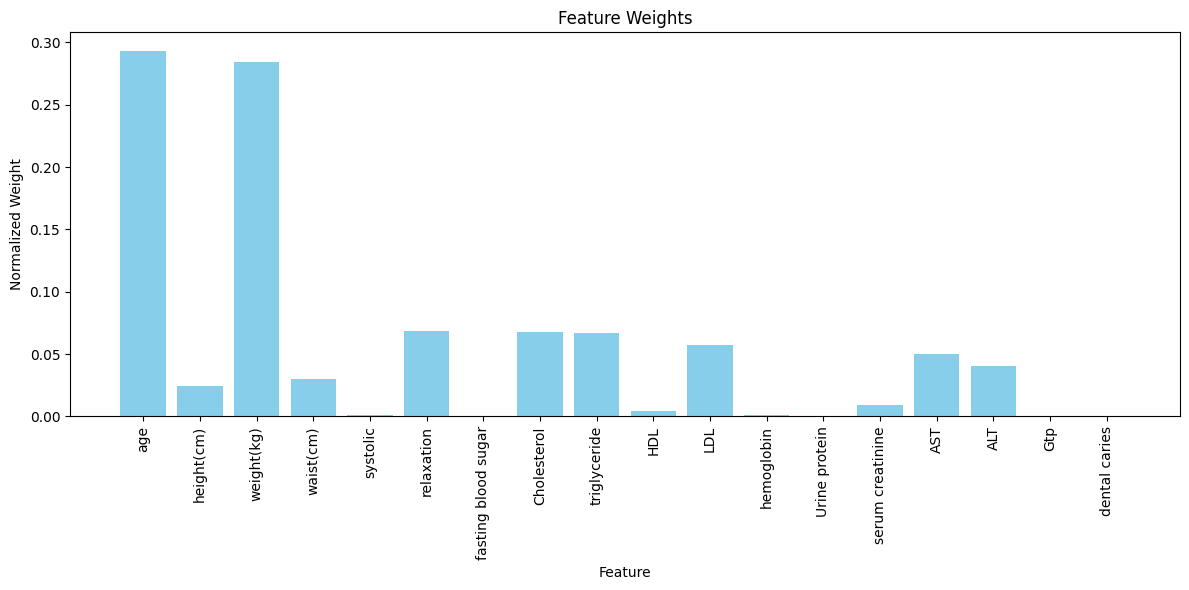

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Step 1: Train a Deep Learning Model
input_dim = X_train.shape[1]

deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = deep_model.fit(
    X_train, y_train,
    epochs=20,  # Adjusted to avoid overfitting
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Extract features from the penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 2: Train Gradient Boosting on Extracted Features
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_features, y_train)

# Get feature importances and normalize them
feature_importances = gb_model.feature_importances_
normalized_weights = feature_importances / feature_importances.sum()

# Map normalized weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}

# Handle columns not included in the mapped weights
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0  # Assign a weight of 0 for missing columns

# Define Normal Ranges
thresholds = {
    'Cholesterol': [(0, 200), (200, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (150, 199), (200, 499), (500, float('inf'))],
    'systolic': [(90, 120), (120, 139), (140, float('inf'))],
    'relaxation': [(60, 80), (80, 89), (90, float('inf'))]
}

# Calculate health score
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        value = row[col]
        score += value * weight  # Use weights directly for simplicity
    return max(1, min(100, score))  # Clamp between 1 and 100

# Apply the formula to the dataset
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Display Feature Weights and Health Scores
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else "Not Defined" for col in numeric_cols]
})

print("\nFeature Weights, Ranges, and Penalties:")
print(results)

# Evaluation Metrics
y_pred = gb_model.predict(X_test_features)
print("\nGradient Boosting Metrics:")
print(classification_report(y_test, y_pred))

# Plot Feature Weights
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Save results
results.to_csv("feature_weights_and_health_scores_gb.csv", index=False)


Epoch 1/20
975/975 [==============================] - 4s 3ms/step - loss: 0.4784 - accuracy: 0.7418 - val_loss: 0.4596 - val_accuracy: 0.7563
Epoch 2/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4593 - accuracy: 0.7580 - val_loss: 0.4582 - val_accuracy: 0.7595
Epoch 3/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4547 - accuracy: 0.7633 - val_loss: 0.4559 - val_accuracy: 0.7622
Epoch 4/20
975/975 [==============================] - 2s 3ms/step - loss: 0.4511 - accuracy: 0.7659 - val_loss: 0.4542 - val_accuracy: 0.7663
Epoch 5/20
975/975 [==============================] - 3s 3ms/step - loss: 0.4483 - accuracy: 0.7701 - val_loss: 0.4618 - val_accuracy: 0.7586
Epoch 6/20
975/975 [==============================] - 2s 2ms/step - loss: 0.4458 - accuracy: 0.7706 - val_loss: 0.4561 - val_accuracy: 0.7608
Epoch 7/20
975/975 [==============================] - 2s 2ms/step - loss: 0.4424 - accuracy: 0.7750 - val_loss: 0.4532 - val_accuracy: 0.7667
Epoch 

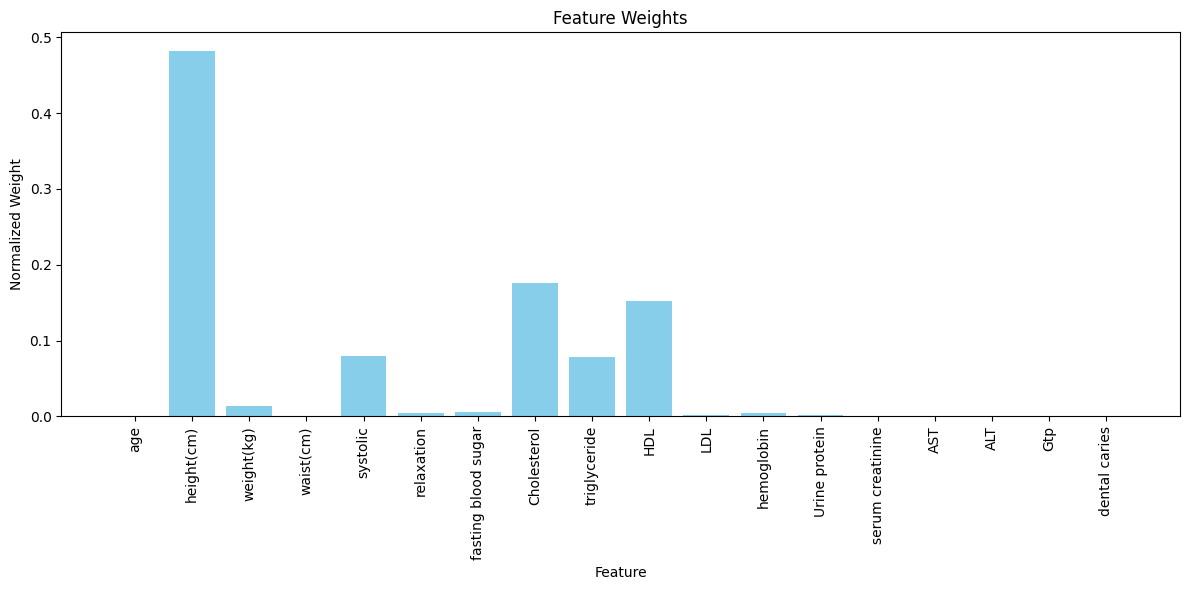

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Step 1: Train a Deep Learning Model
input_dim = X_train.shape[1]

deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = deep_model.fit(
    X_train, y_train,
    epochs=20,  # Adjusted to avoid overfitting
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Extract features from the penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 2: Train Gradient Boosting on Extracted Features
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_features, y_train)

# Get feature importances and normalize them
feature_importances = gb_model.feature_importances_
normalized_weights = feature_importances / feature_importances.sum()

# Map normalized weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}

# Ensure all numeric columns have a weight, assign 0 if not present
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0  # Assign a weight of 0 for missing columns

# Define thresholds for all numeric columns
thresholds = {
    'age': [(18, 25), (26, 35), (36, 50), (51, 65), (65, float('inf'))],
    'height(cm)': [(145, 155), (156, 165), (166, 180), (180, float('inf'))],
    'weight(kg)': [(40, 50), (51, 65), (66, 80), (81, 100), (100, float('inf'))],
    'waist(cm)': [(60, 80), (81, 100), (101, 120), (120, float('inf'))],
    'systolic': [(90, 120), (121, 140), (141, float('inf'))],
    'relaxation': [(60, 80), (81, 89), (90, float('inf'))],
    'Cholesterol': [(0, 200), (201, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (151, 199), (200, 499), (500, float('inf'))],
    'hemoglobin': [(12.0, 15.5), (15.6, 17.0), (17.1, float('inf'))],
    'serum creatinine': [(0.5, 1.2), (1.3, float('inf'))],
    'BMI': [(0, 18.5), (18.6, 24.9), (25, 29.9), (30, float('inf'))]
}

# Apply thresholds for penalties
def calculate_penalty(value, col):
    if col in thresholds:
        for idx, (low, high) in enumerate(thresholds[col]):
            if low <= value <= high:
                return idx * 0.1  # Penalty increases per level
    return 0

# Calculate health score
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        value = row[col]
        penalty = calculate_penalty(value, col)
        score += (value * weight) - penalty
    return max(1, min(100, score))  # Clamp between 1 and 100

# Apply the formula to the dataset
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Display Feature Weights and Health Scores
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else "Not Defined" for col in numeric_cols]
})

print("\nFeature Weights, Ranges, and Penalties:")
print(results)

# Evaluation Metrics
y_pred = gb_model.predict(X_test_features)
print("\nGradient Boosting Metrics:")
print(classification_report(y_test, y_pred))

# Plot Feature Weights
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Save results
results.to_csv("feature_weights_and_health_scores_gb.csv", index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Step 1: Train the SVM Model
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Extract feature importances using weights of the linear kernel
coef = svm_model.coef_[0]
normalized_weights = np.abs(coef) / np.sum(np.abs(coef))

# Map normalized weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}

# Ensure all numeric columns have a weight
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0  # Assign a weight of 0 for missing columns

# Define thresholds and penalties for all numeric columns
thresholds = {
    'age': [(18, 25), (26, 35), (36, 50), (51, 65), (65, float('inf'))],
    'height(cm)': [(145, 155), (156, 165), (166, 180), (180, float('inf'))],
    'weight(kg)': [(40, 50), (51, 65), (66, 80), (81, 100), (100, float('inf'))],
    'waist(cm)': [(60, 80), (81, 100), (101, 120), (120, float('inf'))],
    'systolic': [(90, 120), (121, 140), (141, float('inf'))],
    'relaxation': [(60, 80), (81, 89), (90, float('inf'))],
    'Cholesterol': [(0, 200), (201, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (151, 199), (200, 499), (500, float('inf'))],
    'hemoglobin': [(12.0, 15.5), (15.6, 17.0), (17.1, float('inf'))],
    'serum creatinine': [(0.5, 1.2), (1.3, float('inf'))],
    'BMI': [(0, 18.5), (18.6, 24.9), (25, 29.9), (30, float('inf'))],
    'LDL': [(0, 100), (101, 129), (130, 159), (160, float('inf'))],
    'HDL': [(40, 60), (61, float('inf'))],
    'fasting blood sugar': [(70, 99), (100, 125), (126, float('inf'))],
    'AST': [(10, 40), (41, float('inf'))],
    'ALT': [(7, 56), (57, float('inf'))],
    'Gtp': [(0, 50), (51, 100), (101, float('inf'))]
}

# Apply thresholds for penalties
def calculate_penalty(value, col):
    if col in thresholds:
        for idx, (low, high) in enumerate(thresholds[col]):
            if low <= value <= high:
                return idx * 0.1  # Penalty increases per level
    return 0

# Calculate health score
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        value = row[col]
        penalty = calculate_penalty(value, col)
        score += (value * weight) - penalty
    return max(1, min(100, score))  # Clamp between 1 and 100

# Apply the formula to the dataset
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Display Feature Weights and Health Scores
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else "Not Defined" for col in numeric_cols]
})

print("\nFeature Weights, Ranges, and Penalties:")
print(results)

# Evaluation Metrics
y_pred = svm_model.predict(X_test)
print("\nSVM Metrics:")
print(classification_report(y_test, y_pred))

# Plot Feature Weights
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Save results
results.to_csv("feature_weights_and_health_scores_svm.csv", index=False)
